In [1]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_s

In [2]:
api = wandb.Api()
# Project is specified by <entity/project-name>
runs = api.runs("pl-nc/permuted_mnist_small")

In [ ]:
runs[]

In [29]:
results = {}
for run in runs:
    
    if not("100n_" in run.name):
        continue
    
    df = run.history(pandas=True)
    res = df[["accuracies", "_step"]].iloc[:30]
    res["nc1"] = df["nc1"].iloc[1:31].to_numpy()
    res = res.drop(columns = "_step")
    results[run.name] = res

In [30]:
results["100n_5epoch_0.001"].head()

,accuracies,nc1
0,0.953997,0.469991
1,0.964960,0.457835
2,0.965523,0.463065
3,0.965883,0.474804
4,0.966730,0.414775


In [37]:
cors = []
for key in results:
    cor =  np.corrcoef(results[key], rowvar= False)[0,1]
    cors.append(cor)
    print(key, cor)

100n_5epoch_0.001 -0.2510964185109772
100n_10epoch_0.01 -0.7695517859687068
100n_10epoch_0.005 -0.02633166074691039
100n_10epoch_0.001 -0.5988479674937193
100n_1epoch_0.01 -0.5770679865314718
100n_5epoch_0.005 0.2387971807857303
100n_5epoch_0.01 -0.37341215451609605
100n_1epoch_0.005 -0.4588987530809897
100n_1epoch_0.001 -0.36031407331949883


In [39]:
a = np.array(cors)
print(a.mean())
print(a.std())

-0.3529692910425155
0.29119833108050447
0.08479646802407109


In [40]:
a

array([-0.25109642, -0.76955179, -0.02633166, -0.59884797, -0.57706799,
        0.23879718, -0.37341215, -0.45889875, -0.36031407])

In [81]:
res = pd.DataFrame(results).transpose().sort_index()
n_tasks = len(res.columns)
for i in range(1, n_tasks):
    res[f"pl_task_{i}"] = res[0]-res[i]

n_epochs_df = pd.DataFrame(n_epochs.values(), index=n_epochs.keys()).sort_index()
n_epochs_df.columns = ["n_epochs"]

res = res.join(n_epochs_df)
res

,0,1,2,3,4,5,6,7,8,9,...,pl_task_91,pl_task_92,pl_task_93,pl_task_94,pl_task_95,pl_task_96,pl_task_97,pl_task_98,pl_task_99,n_epochs
0.170698,0.973578,0.914199,0.911832,0.911465,0.903482,0.898515,0.898448,0.906248,0.899798,0.901915,...,0.140864,0.153964,0.156264,0.151497,0.146281,0.133847,0.130380,0.143114,0.136797,9
0.178288,0.969564,0.917582,0.916532,0.913582,0.907415,0.905532,0.907848,0.908015,0.900632,0.899915,...,0.155684,0.138017,0.150684,0.142834,0.133667,0.133884,0.137750,0.132967,0.141217,7
0.178349,0.987816,0.894465,0.890315,0.900782,0.888715,0.888798,0.890782,0.891898,0.885798,0.886665,...,0.153236,0.159419,0.154269,0.157536,0.167286,0.177469,0.174686,0.149619,0.162902,35
0.179345,0.987568,0.894432,0.897632,0.893665,0.894982,0.895898,0.893715,0.886715,0.875681,0.886765,...,0.205588,0.168337,0.185704,0.165004,0.166904,0.174737,0.161437,0.172737,0.172537,34
0.179997,0.953628,0.922615,0.915465,0.915099,0.915332,0.905648,0.906665,0.910249,0.901965,0.899315,...,0.126464,0.153648,0.137197,0.139331,0.120880,0.117480,0.114730,0.110330,0.132247,3
0.189955,0.954255,0.922749,0.921615,0.912315,0.909899,0.910082,0.900748,0.896482,0.898965,0.897032,...,0.160842,0.138558,0.119191,0.118708,0.116958,0.106591,0.103674,0.103241,0.120358,3
0.190818,0.944175,0.924532,0.920799,0.918549,0.913499,0.909465,0.908382,0.909532,0.904165,0.902898,...,0.111711,0.100510,0.107294,0.090060,0.099494,0.105411,0.107544,0.111761,0.104261,2
0.193318,0.953333,0.923749,0.918615,0.915432,0.914915,0.909182,0.908298,0.903615,0.900315,0.903765,...,0.105852,0.141453,0.128186,0.136919,0.127519,0.112752,0.117286,0.114936,0.108852,3
0.195038,0.952944,0.923532,0.918482,0.913599,0.910882,0.914332,0.911565,0.907798,0.896948,0.901382,...,0.140197,0.134014,0.126180,0.137664,0.137614,0.124097,0.141231,0.149214,0.145381,3
0.197323,0.945133,0.923615,0.923765,0.917399,0.908132,0.910098,0.910482,0.900415,0.894998,0.896248,...,0.104335,0.107869,0.105419,0.132186,0.129469,0.095935,0.103885,0.089802,0.091785,2


In [32]:
pl_columns = [name for name in res.columns if str(name).startswith("pl")]
res_pl = res[pl_columns]

In [63]:
nc_values = res_pl.index.to_numpy()
nc_pl_cor = [np.corrcoef(nc_values, res_pl.iloc[:, i])[0,1] for i in range(len(res_pl.columns))]
nc_epochs_cor = np.corrcoef(nc_values, res["n_epochs"])
epochs_pl_cor = [np.corrcoef(res["n_epochs"], res_pl.iloc[:, i])[0,1] for i in range(len(res_pl.columns))]

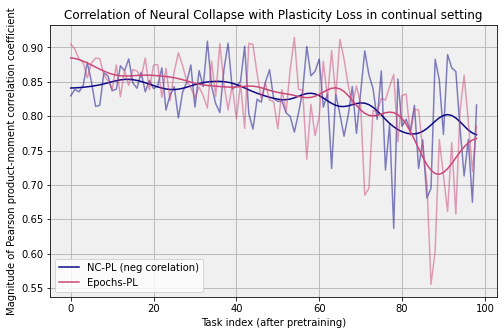

In [82]:
sigma = 4
colors = plt.cm.get_cmap('plasma', 3)
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(np.absolute(nc_pl_cor), color = colors(0), alpha = 0.5)
ax.plot(gaussian_filter1d(np.absolute(nc_pl_cor), sigma=sigma), label = "NC-PL (neg corelation)", color = colors(0))

ax.plot(epochs_pl_cor, color = colors(1), alpha = 0.5)
ax.plot(gaussian_filter1d(np.absolute(epochs_pl_cor), sigma=sigma), label = "Epochs-PL", color = colors(1))

ax.set_xlabel("Task index (after pretraining)")
# ax.set_ylabel("Magnitude of Pearson product-moment correlation coefficient")
ax.set_ylabel("Magnitude of Pearson correlation coefficient")

ax.set_facecolor('#f0f0f0')
plt.title('Correlation of Neural Collapse with Plasticity Loss in continual setting')
ax.grid()
ax.legend(loc='lower left')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9]